In [ ]:
# Step 1: Setup Environment
import os
import numpy as np
from PIL import Image  # Import PIL for handling GIFs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 3: Download and Unzip Dataset (Uncomment if not done previously)
!pip install -q kaggle
# Upload your kaggle.json and run the below commands
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abhaysharma38/indian-folk-art-gallery-high-resolution-images
!unzip indian-folk-art-gallery-high-resolution-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/282.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/283.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/284.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/285.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/286.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/287.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/288.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/289.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/29.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/290.jpg  
  inflating: folk-art-dataset-main/Rajasthani Miniature Painting (Rajasthan)/291

In [ ]:

# Step 4: Load and Preprocess Images
image_dir = '/content/folk-art-dataset-main/'  # Change if necessary
labels = os.listdir(image_dir)
IMG_SIZE = 128  # Image dimensions
images = []
image_labels = []

def load_images(image_dir, labels):
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        if os.path.isdir(label_dir):
            for img_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_file)
                file_extension = img_file.split('.')[-1].lower()  # Get file extension
                if file_extension not in ['jpg', 'jpeg', 'png', 'gif']:  # List of supported formats
                    print(f"Unsupported format for image: {img_path}")
                    continue

                try:
                    # Use PIL for opening GIFs and other formats
                    image = Image.open(img_path)

                    # Convert image to RGB, handling palette images
                    image = image.convert('RGB')
                    image = image.resize((IMG_SIZE, IMG_SIZE))  # Resize to IMG_SIZE
                    image = np.array(image)  # Convert to numpy array

                    # Ensure the image shape is as expected
                    if image.shape == (IMG_SIZE, IMG_SIZE, 3):
                        images.append(image)
                        image_labels.append(label)
                    else:
                        print(f"Image shape mismatch for {img_path}: {image.shape}")
                except Exception as e:
                    print(f"Error loading image: {img_path} - {e}")

load_images(image_dir, labels)

# Convert images to numpy array
images = np.array(images, dtype='float32')
# Normalize pixel values to [0, 1]
images /= 255.0

# Map labels to numerical values
label_to_num = {label: idx for idx, label in enumerate(np.unique(image_labels))}
numerical_labels = np.array([label_to_num[label] for label in image_labels])
y_categorical = to_categorical(numerical_labels, num_classes=len(label_to_num))

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, y_categorical, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Define the CNN Model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Regularization
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the CNN model
input_shape = (IMG_SIZE, IMG_SIZE, 3)
cnn_model = create_cnn_model(input_shape, num_classes=len(label_to_num))

In [ ]:

# Step 6: Compile and Train the Model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


Epoch 1/50
808/808 [==============================] - 88s 108ms/step - loss: 3.1471 - accuracy: 0.1178 - val_loss: 2.6391 - val_accuracy: 0.2870
Epoch 2/50
808/808 [==============================] - 82s 102ms/step - loss: 2.6456 - accuracy: 0.2559 - val_loss: 2.3047 - val_accuracy: 0.3966
Epoch 3/50
808/808 [==============================] - 81s 100ms/step - loss: 2.2598 - accuracy: 0.3491 - val_loss: 1.9611 - val_accuracy: 0.4643
Epoch 4/50
808/808 [==============================] - 83s 102ms/step - loss: 1.9424 - accuracy: 0.4315 - val_loss: 1.7211 - val_accuracy: 0.5318
Epoch 5/50
808/808 [==============================] - 81s 100ms/step - loss: 1.6828 - accuracy: 0.4962 - val_loss: 1.7414 - val_accuracy: 0.5279
Epoch 6/50
808/808 [==============================] - 81s 100ms/step - loss: 1.4714 - accuracy: 0.5523 - val_loss: 1.4399 - val_accuracy: 0.6115
Epoch 7/50
808/808 [==============================] - 79s 98ms/step - loss: 1.2937 - accuracy: 0.6009 - val_loss: 1.3670 - val_acc

In [ ]:
# Step 7: Evaluate the Model
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

202/202 [==============================] - 5s 27ms/step - loss: 2.3790 - accuracy: 0.7387
Validation Loss: 2.378960371017456, Validation Accuracy: 0.7386662364006042


In [ ]:

# Step 8: Save the Model
model_path = '/content/drive/MyDrive/indian_folk_art_cnn_model_update50.h5'  # Update path if necessary
cnn_model.save(model_path)
print("Model saved successfully.")

Model saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


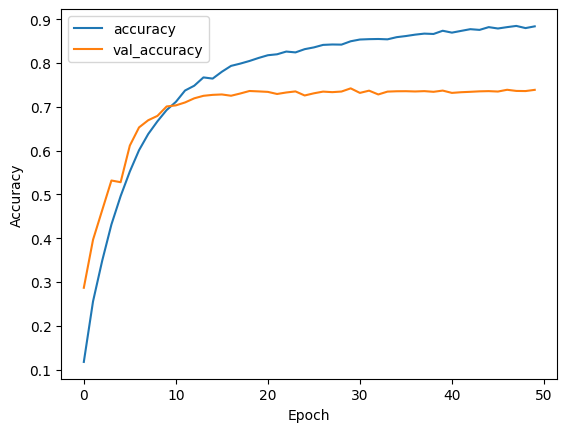

In [ ]:
# Visualize Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Saving 1036.jpg to 1036.jpg


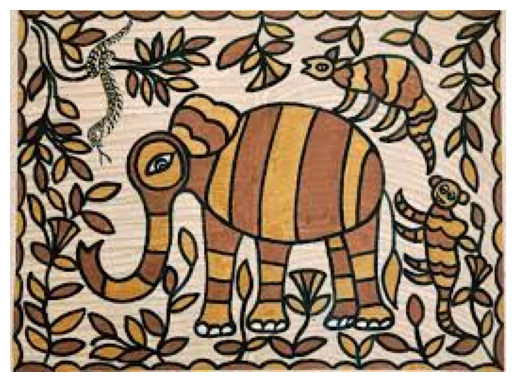

1/1 [==============================] - 0s 77ms/step
Predicted Class: Sohrai Art (Jharkhand)
Confidence: 100.00%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Define class labels manually
class_labels = [
    'Aipan Art (Uttarakhand)',
    'Assamese Miniature Painting (Assam)',
    'Basholi Painting (Jammu and Kashmir)',
    'Bhil Painting (Madhya Pradesh)',
    'Chamba Rumal (Himachal Pradesh)',
    'Cheriyal Scroll Painting (Telangana)',
    'Dokra Art (West Bengal)',
    'Gond Painting (Madhya Pradesh)',
    'Kalamkari Painting (Andhra Pradesh and Telangana)',
    'Kalighat Painting (West Bengal)',
    'Kangra Painting (Himachal Pradesh)',
    'Kerala Mural Painting (Kerala)',
    'Kondapalli Bommallu (Andhra Pradesh)',
    'Kutch Lippan Art (Gujarat)',
    'Leather Puppet Art (Andhra Pradesh)',
    'Madhubani Painting (Bihar)',
    'Mandala Art',
    'Mandana Art (Rajasthan)',
    'Mata Ni Pachedi (Gujarat)',
    'Meenakari Painting (Rajasthan)',
    'Mughal Paintings',
    'Mysore Ganjifa Art (Karnataka)',
    'Pattachitra Painting (Odisha and Bengal)',
    'Patua Painting (West Bengal)',
    'Pichwai Painting (Rajasthan)',
    'Rajasthani Miniature Painting (Rajasthan)',
    'Rogan Art from Kutch (Gujarat)',
    'Sohrai Art (Jharkhand)',
    'Tikuli Art (Bihar)',
    'Warli Folk Painting (Maharashtra)'
]

# Function to upload and display image
def upload_and_predict():
    # Load the trained model
    model = load_model('/content/drive/MyDrive/indian_folk_art_cnn_model_update50.h5')

    # Upload an image file
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Load the image and display it
        img = Image.open(fn)
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.show()

        # Preprocess the image (resize and rescale)
        img = img.resize((128, 128))  # Resizing to match the input shape of the model
        img_array = image.img_to_array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        confidence = np.max(predictions) * 100  # Get confidence as a percentage

        # Output the predicted class name and accuracy percentage
        print(f"Predicted Class: {class_labels[predicted_class[0]]}")
        print(f"Confidence: {confidence:.2f}%")

# Call the function to upload and predict
upload_and_predict()


Saving 848.jpg to 848.jpg


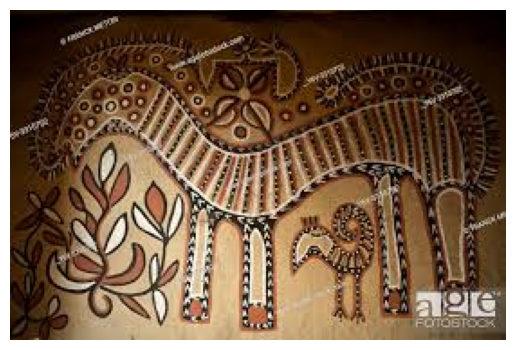

1/1 [==============================] - 0s 81ms/step
Predicted Class: Sohrai Art (Jharkhand)
Confidence: 67.21%
Enter the true label index for this image (0 to 29): 29


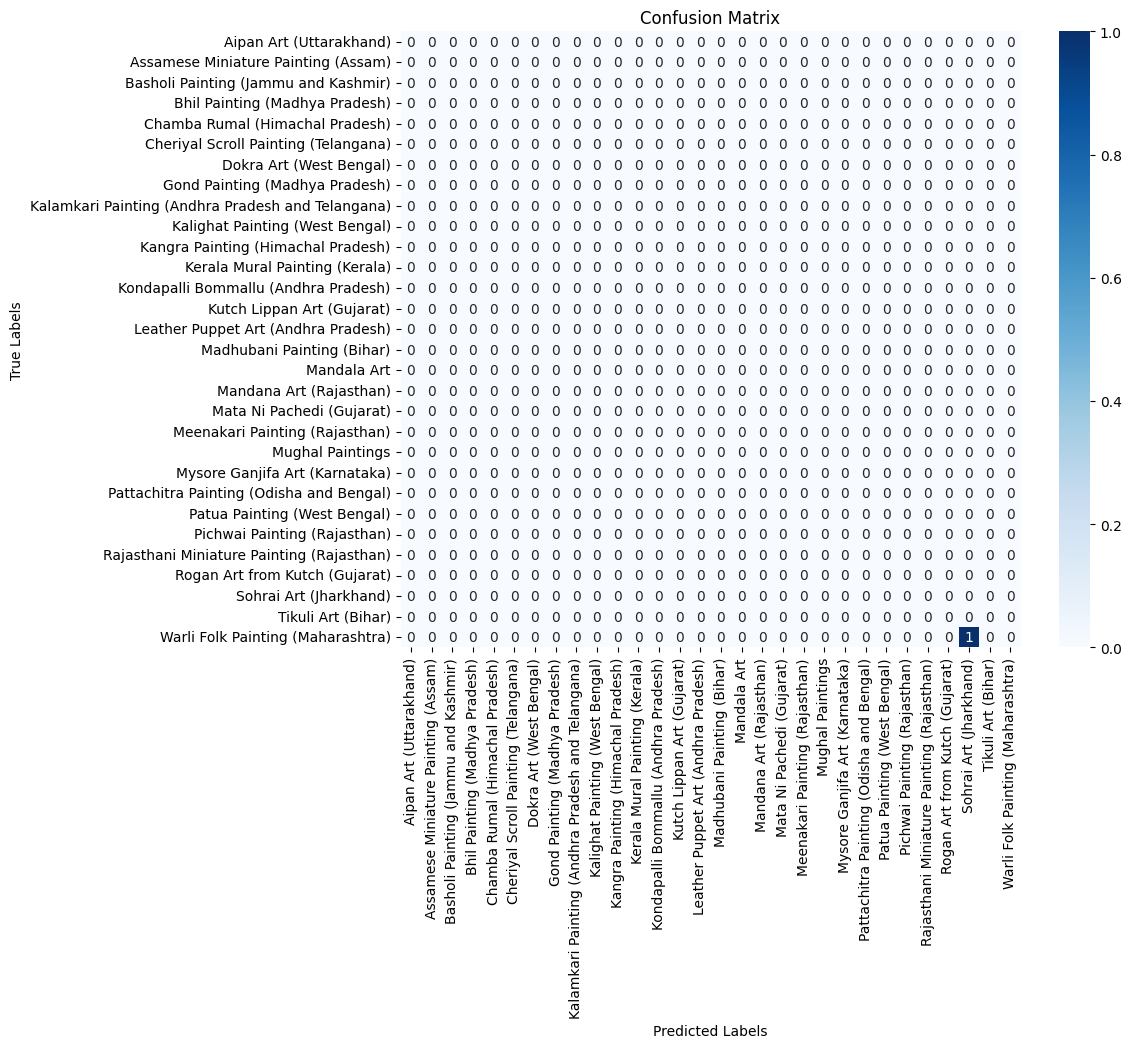

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Define class labels manually
class_labels = [
    'Aipan Art (Uttarakhand)',
    'Assamese Miniature Painting (Assam)',
    'Basholi Painting (Jammu and Kashmir)',
    'Bhil Painting (Madhya Pradesh)',
    'Chamba Rumal (Himachal Pradesh)',
    'Cheriyal Scroll Painting (Telangana)',
    'Dokra Art (West Bengal)',
    'Gond Painting (Madhya Pradesh)',
    'Kalamkari Painting (Andhra Pradesh and Telangana)',
    'Kalighat Painting (West Bengal)',
    'Kangra Painting (Himachal Pradesh)',
    'Kerala Mural Painting (Kerala)',
    'Kondapalli Bommallu (Andhra Pradesh)',
    'Kutch Lippan Art (Gujarat)',
    'Leather Puppet Art (Andhra Pradesh)',
    'Madhubani Painting (Bihar)',
    'Mandala Art',
    'Mandana Art (Rajasthan)',
    'Mata Ni Pachedi (Gujarat)',
    'Meenakari Painting (Rajasthan)',
    'Mughal Paintings',
    'Mysore Ganjifa Art (Karnataka)',
    'Pattachitra Painting (Odisha and Bengal)',
    'Patua Painting (West Bengal)',
    'Pichwai Painting (Rajasthan)',
    'Rajasthani Miniature Painting (Rajasthan)',
    'Rogan Art from Kutch (Gujarat)',
    'Sohrai Art (Jharkhand)',
    'Tikuli Art (Bihar)',
    'Warli Folk Painting (Maharashtra)'
]

# Function to upload images, predict, and display confusion matrix
def upload_and_predict_with_confusion_matrix():
    # Load the trained model
    model = load_model('/content/drive/MyDrive/indian_folk_art_cnn_model_update50.h5')

    # Upload image files
    uploaded = files.upload()

    # Lists to store true labels and predicted labels for the confusion matrix
    true_labels = []
    predicted_labels = []

    for fn in uploaded.keys():
        # Load and display the image
        img = Image.open(fn)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocess the image (resize and rescale)
        img = img.resize((128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        confidence = np.max(predictions) * 100

        # Display the prediction and confidence
        print(f"Predicted Class: {class_labels[predicted_class[0]]}")
        print(f"Confidence: {confidence:.2f}%")

        # Simulate true label collection (adjust to match the actual label)
        true_label_index = int(input("Enter the true label index for this image (0 to 29): "))  # Collect actual label index from user
        true_labels.append(true_label_index)
        predicted_labels.append(predicted_class[0])

    # Generate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(class_labels)))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function
upload_and_predict_with_confusion_matrix()


 1. **VGG16**


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(label_to_num), activation='softmax')(x)

# Define and compile the model
vgg16_model = Model(inputs=base_model.input, outputs=output)
vgg16_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG16 model
vgg16_history = vgg16_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
808/808 [==============================] - 229s 281ms/step - loss: 2.8261 - accuracy: 0.2135 - val_loss: 2.3320 - val_accuracy: 0.3812
Epoch 2/50
808/808 [==============================] - 225s 279ms/step - loss: 2.3606 - accuracy: 0.3354 - val_loss: 2.0732 - val_accuracy: 0.4402
Epoch 3/50
808/808 [==============================] - 223s 276ms/step - loss: 2.1860 - accuracy: 0.3826 - val_loss: 1.9715 - val_accuracy: 0.4744
Epoch 4/50
808/808 [==============================] - 226s 279ms/step - loss: 2.0863 - accuracy: 0.4103 - val_loss: 1.9108 - val_accuracy: 0.4722
Epoch 5/50
808/808 [==============================] - 223s 276ms/step - loss: 2.0122 - accuracy: 0.4277 - val_loss: 1.8065 - val_accuracy: 0.5019
Epoch 6/50
808/808 [==============================] - 224s 277ms/step - loss: 1.9660 - accuracy: 0.4385 - val_loss: 1.7777 - val_accuracy: 0.5095
Epoch 7/50
808/808 [==============================] - 224s 

KeyboardInterrupt: 

In [ ]:
val_loss, val_accuracy = vgg16_model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


202/202 [==============================] - 47s 230ms/step - loss: 1.6891 - accuracy: 0.5287
Validation Loss: 1.6890928745269775, Validation Accuracy: 0.5287018418312073


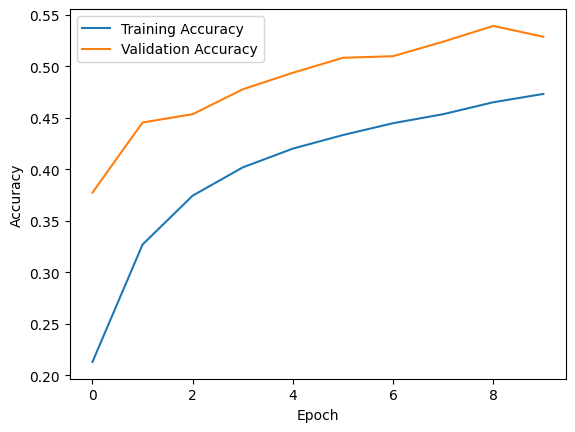

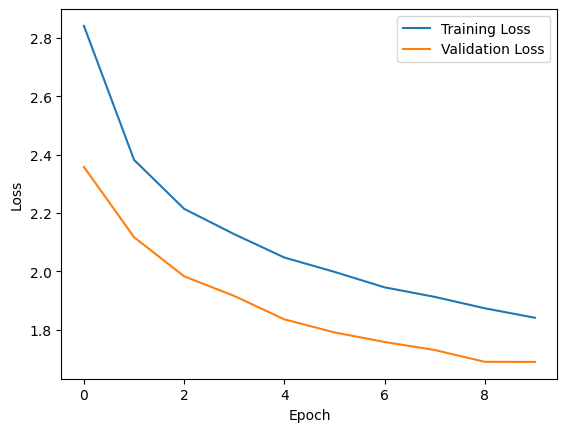

In [ ]:
import matplotlib.pyplot as plt

plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model_path = '/content/drive/MyDrive/indian_folk_art_vgg16_model50.h5'
vgg16_model.save(model_path)
print("Model saved successfully.")


Model saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Define class labels manually (ensure it matches the training class order)
class_labels = [
    'Aipan Art (Uttarakhand)',
    'Assamese Miniature Painting (Assam)',
    'Basholi Painting (Jammu and Kashmir)',
    'Bhil Painting (Madhya Pradesh)',
    'Chamba Rumal (Himachal Pradesh)',
    'Cheriyal Scroll Painting (Telangana)',
    'Dokra Art (West Bengal)',
    'Gond Painting (Madhya Pradesh)',
    'Kalamkari Painting (Andhra Pradesh and Telangana)',
    'Kalighat Painting (West Bengal)',
    'Kangra Painting (Himachal Pradesh)',
    'Kerala Mural Painting (Kerala)',
    'Kondapalli Bommallu (Andhra Pradesh)',
    'Kutch Lippan Art (Gujarat)',
    'Leather Puppet Art (Andhra Pradesh)',
    'Madhubani Painting (Bihar)',
    'Mandala Art',
    'Mandana Art (Rajasthan)',
    'Mata Ni Pachedi (Gujarat)',
    'Meenakari Painting (Rajasthan)',
    'Mughal Paintings',
    'Mysore Ganjifa Art (Karnataka)',
    'Pattachitra Painting (Odisha and Bengal)',
    'Patua Painting (West Bengal)',
    'Pichwai Painting (Rajasthan)',
    'Rajasthani Miniature Painting (Rajasthan)',
    'Rogan Art from Kutch (Gujarat)',
    'Sohrai Art (Jharkhand)',
    'Tikuli Art (Bihar)',
    'Warli Folk Painting (Maharashtra)'
]

# Function to upload and predict multiple images
def upload_and_predict():
    # Load the saved model
    model_path = '/content/drive/MyDrive/indian_folk_art_vgg16_model10.h5'  # Update path if necessary
    model = load_model(model_path)

    # Upload multiple image files
    uploaded = files.upload()

    # Iterate through uploaded images
    for fn in uploaded.keys():
        # Load the image and display it
        img = Image.open(fn)
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.show()

        # Preprocess the image (resize and rescale)
        img = img.resize((128, 128))  # Adjust size to model's input
        img_array = image.img_to_array(img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        confidence = np.max(predictions) * 100  # Get confidence as a percentage

        # Output the predicted class name and confidence level
        print(f"Uploaded Image: {fn}")
        print(f"Predicted Class: {class_labels[predicted_class[0]]}")
        print(f"Confidence: {confidence:.2f}%\n")

# Call the function to upload and predict
upload_and_predict()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/indian_folk_art_vgg16_model10.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

2. **ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(label_to_num), activation='softmax')(x)

# Define and compile the model
resnet50_model = Model(inputs=base_model.input, outputs=output)
resnet50_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ResNet50 model
resnet50_history = resnet50_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
808/808 [==============================] - 222s 271ms/step - loss: 3.3601 - accuracy: 0.0528 - val_loss: 3.2983 - val_accuracy: 0.0801
Epoch 2/10
808/808 [==============================] - 205s 254ms/step - loss: 3.2844 - accuracy: 0.0726 - val_loss: 3.2239 - val_accuracy: 0.1227
Epoch 3/10
808/808 [==============================] - 202s 250ms/step - loss: 3.2259 - accuracy: 0.0908 - val_loss: 3.1583 - val_accuracy: 0.1320
Epoch 4/10
808/808 [==============================] - 206s 255ms/step - loss: 3.1845 - accuracy: 0.1025 - val_loss: 3.1092 - val_accuracy: 0.1479
Epoch 5/10
808/808 [==============================] - 204s 253ms/step - loss: 3.1499 - accuracy: 0.1118 - val_loss: 3.0783 - val_accuracy: 0.1577
Epoch 6/10
808/808 [==============================] - 203s 251ms/step - loss: 3.1314 - accuracy: 0.1169 - val_loss: 3.0480 - val_accuracy: 0.1631
Epoch 7/10
808/808 [==============================] - 206s 

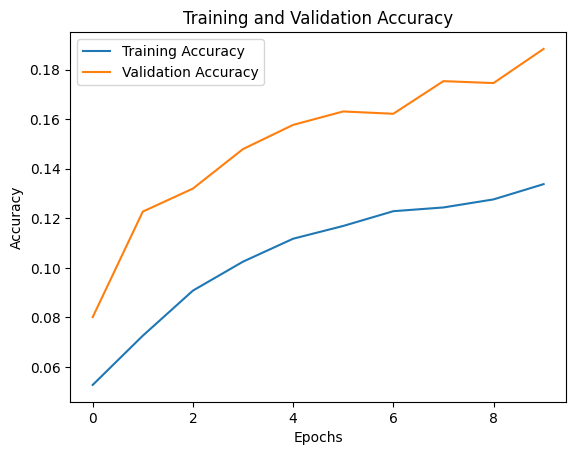

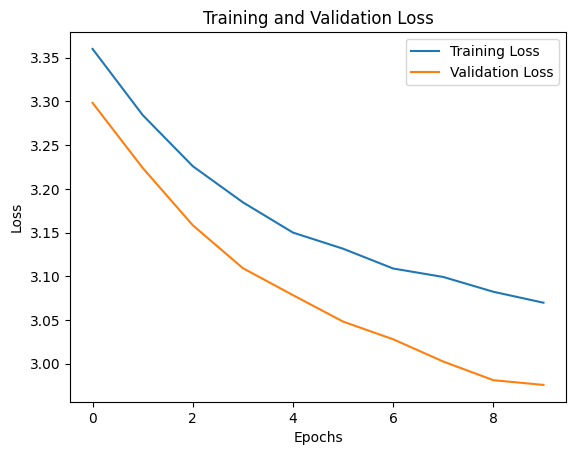

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(resnet50_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet50_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(resnet50_history.history['loss'], label='Training Loss')
plt.plot(resnet50_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the model to Google Drive
model_path = '/content/drive/MyDrive/resnet50_folk_art_model10.h5'  # Update path if necessary
resnet50_model.save(model_path)

print("Model saved to Google Drive successfully!")

Model saved to Google Drive successfully!


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
from google.colab import files

# Define class labels (same order as in training)
class_labels = [
    'Aipan Art (Uttarakhand)',
    'Assamese Miniature Painting (Assam)',
    'Basholi Painting (Jammu and Kashmir)',
    'Bhil Painting (Madhya Pradesh)',
    'Chamba Rumal (Himachal Pradesh)',
    'Cheriyal Scroll Painting (Telangana)',
    'Dokra Art (West Bengal)',
    'Gond Painting (Madhya Pradesh)',
    'Kalamkari Painting (Andhra Pradesh and Telangana)',
    'Kalighat Painting (West Bengal)',
    'Kangra Painting (Himachal Pradesh)',
    'Kerala Mural Painting (Kerala)',
    'Kondapalli Bommallu (Andhra Pradesh)',
    'Kutch Lippan Art (Gujarat)',
    'Leather Puppet Art (Andhra Pradesh)',
    'Madhubani Painting (Bihar)',
    'Mandala Art',
    'Mandana Art (Rajasthan)',
    'Mata Ni Pachedi (Gujarat)',
    'Meenakari Painting (Rajasthan)',
    'Mughal Paintings',
    'Mysore Ganjifa Art (Karnataka)',
    'Pattachitra Painting (Odisha and Bengal)',
    'Patua Painting (West Bengal)',
    'Pichwai Painting (Rajasthan)',
    'Rajasthani Miniature Painting (Rajasthan)',
    'Rogan Art from Kutch (Gujarat)',
    'Sohrai Art (Jharkhand)',
    'Tikuli Art (Bihar)',
    'Warli Folk Painting (Maharashtra)'
]

def upload_and_predict_multiple():
    uploaded = files.upload()  # Upload multiple images
    for fn in uploaded.keys():
        # Load and preprocess each image
        img = Image.open(fn).resize((IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the class
        predictions = resnet50_model.predict(img_array)
        predicted_class = np.argmax(predictions)
        confidence = np.max(predictions) * 100  # Get confidence as a percentage

        # Print prediction and confidence for each uploaded image
        print(f"Uploaded Image: {fn}")
        print(f"Predicted Class: {class_labels[predicted_class]}")
        print(f"Confidence: {confidence:.2f}%\n")

# Call this function to upload and test multiple images
upload_and_predict_multiple()


Saving 42.jpg to 42.jpg
1/1 [==============================] - 1s 878ms/step
Uploaded Image: 42.jpg
Predicted Class: Sohrai Art (Jharkhand)
Confidence: 35.11%



3. InceptionV3


In [ ]:
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(label_to_num), activation='softmax')(x)

# Define and compile the model
inception_model = Model(inputs=base_model.input, outputs=output)
inception_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the InceptionV3 model
inception_history = inception_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
808/808 [==============================] - 87s 103ms/step - loss: 3.3677 - accuracy: 0.0507 - val_loss: 3.2536 - val_accuracy: 0.0755
Epoch 2/10
808/808 [==============================] - 82s 102ms/step - loss: 3.2767 - accuracy: 0.0602 - val_loss: 3.1460 - val_accuracy: 0.1130
Epoch 3/10
808/808 [==============================] - 82s 102ms/step - loss: 3.2214 - accuracy: 0.0742 - val_loss: 3.0847 - val_accuracy: 0.1323
Epoch 4/10
808/808 [==============================] - 82s 101ms/step - loss: 3.1864 - accuracy: 0.0827 - val_loss: 2.9750 - val_accuracy: 0.1779
Epoch 5/10
808/808 [==============================] - 82s 102ms/step - loss: 3.1589 - accuracy: 0.0875 - val_loss: 2.9630 - val_accuracy: 0.1821
Epoch 6/10
808/808 [==============================] - 82s 102ms/step - loss: 3.1256 - accuracy: 0.0960 - val_loss: 2.9470 - val_accuracy: 0.1881
Epoch 7/10
808/808 [==============================] - 81s 100ms/step - loss: 3.0938 - accuracy: 0.1014 - val_loss: 2.8152 - val_ac

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Constants
IMG_SIZE = 128  # The image size your model expects
BATCH_SIZE = 32
test_data_dir = '/path/to/your/test_data'  # Update with the correct path

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # For multi-class classification
    shuffle=False  # Important for evaluation to keep the order
)

# Evaluate the model on the test set
test_loss, test_accuracy = inception_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Save the model
model_path = '/content/drive/MyDrive/inception_model10.h5'  # Update path if necessary
inception_model.save(model_path)


In [ ]:
# Step 1: Imports and Setup
import os
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Step 2: Load CNN Model and Setup Feature Extractor
def load_and_prepare_cnn_model(cnn_model_path):
    # Load the trained CNN model
    cnn_model = load_model(cnn_model_path)

    # Create a feature extractor by removing the classification layers
    # Select a layer that outputs a 4D tensor (usually the last convolutional layer)
    cnn_feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-5].output)  # Adjust the index if necessary

    return cnn_feature_extractor

# Step 3: Convert Images to RGB (to avoid transparency issues)
def convert_images_to_rgb(dataset_path):
    from tensorflow.keras.preprocessing.image import img_to_array, load_img

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.png', '.gif', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = load_img(img_path)
                img = img.convert('RGB')  # Convert to RGB
                img.save(img_path)

# Step 4: Data Augmentation and Loading
def prepare_data_generators(dataset_path, img_size=128, batch_size=64):
    # Data augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2  # 20% for validation
    )

    # Training data generator
    train_data = train_datagen.flow_from_directory(
        dataset_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    # Validation data generator
    val_data = train_datagen.flow_from_directory(
        dataset_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_data, val_data

# Step 5: Feature Extraction using CNN
def extract_features(data_generator, feature_extractor):
    features = []
    labels = []

    for inputs_batch, labels_batch in data_generator:
        # Extract features from each batch
        features_batch = feature_extractor.predict(inputs_batch)
        features.append(features_batch)
        labels.append(labels_batch)

    return np.concatenate(features), np.concatenate(labels)

# Step 6: Train SVM Classifier
def train_svm_classifier(train_features, train_labels):
    scaler = StandardScaler()
    train_features_scaled = scaler.fit_transform(train_features.reshape(train_features.shape[0], -1))  # Flatten features

    # Train the SVM classifier
    svm_classifier = SVC(kernel='linear', probability=True)
    svm_classifier.fit(train_features_scaled, np.argmax(train_labels, axis=1))

    return svm_classifier, scaler

# Step 7: Train Random Forest Classifier
def train_rf_classifier(train_features, train_labels):
    scaler = StandardScaler()
    train_features_scaled = scaler.fit_transform(train_features.reshape(train_features.shape[0], -1))  # Flatten features

    # Train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(train_features_scaled, np.argmax(train_labels, axis=1))

    return rf_classifier, scaler

# Step 8: Save Models to Google Drive
def save_model_to_drive(model, scaler, model_name, scaler_name):
    model_path = f'/content/drive/MyDrive/{model_name}.pkl'
    joblib.dump(model, model_path)
    print(f"{model_name} saved at {model_path}")

    scaler_path = f'/content/drive/MyDrive/{scaler_name}.pkl'
    joblib.dump(scaler, scaler_path)
    print(f"Scaler saved at {scaler_path}")

# Step 9: Evaluate Model Performance
def evaluate_model_performance(model, val_features, val_labels, scaler):
    val_features_scaled = scaler.transform(val_features.reshape(val_features.shape[0], -1))  # Flatten features
    accuracy = model.score(val_features_scaled, np.argmax(val_labels, axis=1))
    return accuracy

# Step 10: Main Function to Run the Workflow
def main():
    # Paths
    dataset_path = '/content/folk-art-dataset-main'
    cnn_model_path = '/content/drive/MyDrive/indian_folk_art_cnn_model_updae30.h5'

    # Step 1: Convert images to RGB (if necessary)
    convert_images_to_rgb(dataset_path)

    # Step 2: Prepare data generators
    train_data, val_data = prepare_data_generators(dataset_path)

    # Step 3: Load CNN model and prepare feature extractor
    cnn_feature_extractor = load_and_prepare_cnn_model(cnn_model_path)

    # Step 4: Extract features
    train_features, train_labels = extract_features(train_data, cnn_feature_extractor)
    val_features, val_labels = extract_features(val_data, cnn_feature_extractor)

    # Step 5: Train and Save SVM Classifier
    svm_classifier, svm_scaler = train_svm_classifier(train_features, train_labels)
    save_model_to_drive(svm_classifier, svm_scaler, "svm_folk_art_model", "svm_scaler")

    # Step 6: Train and Save Random Forest Classifier
    rf_classifier, rf_scaler = train_rf_classifier(train_features, train_labels)
    save_model_to_drive(rf_classifier, rf_scaler, "rf_folk_art_model", "rf_scaler")

    # Step 7: Evaluate Models
    svm_accuracy = evaluate_model_performance(svm_classifier, val_features, val_labels, svm_scaler)
    rf_accuracy = evaluate_model_performance(rf_classifier, val_features, val_labels, rf_scaler)

    print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")
    print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

    # Plot the comparison
    models = ['SVM', 'Random Forest']
    accuracy = [svm_accuracy, rf_accuracy]
    plt.bar(models, accuracy, color=['blue', 'green'])
    plt.ylabel('Accuracy')
    plt.title('SVM vs Random Forest Performance')
    plt.show()

# Run the workflow
main()


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define input size and number of labels
IMG_SIZE = 128  # Adjust according to your dataset
num_classes = len(label_to_num)  # Number of classes in your dataset

# Load the pre-trained EfficientNetB0 model (without the top layer)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base model layers

# Add custom layers on top of EfficientNet
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(128, activation='relu')(x)  # Add a dense layer with ReLU activation
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax for multi-class classification

# Create the complete model
efficientnet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
efficientnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (assuming X_train, y_train, X_val, y_val are defined)
efficientnet_history = efficientnet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Save the model if needed
efficientnet_model.save('/content/drive/MyDrive/efficientnet_folk_art_model.h5')

# Print the model summary
efficientnet_model.summary()


16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/30
808/808 [==============================] - 125s 148ms/step - loss: 3.4032 - accuracy: 0.0367 - val_loss: 3.3999 - val_accuracy: 0.0419
Epoch 2/30
808/808 [==============================] - 118s 146ms/step - loss: 3.4000 - accuracy: 0.0379 - val_loss: 3.3995 - val_accuracy: 0.0419
Epoch 3/30
808/808 [==============================] - 119s 147ms/step - loss: 3.3999 - accuracy: 0.0374 - val_loss: 3.3995 - val_accuracy: 0.0419
Epoch 4/30
808/808 [==============================] - 119s 147ms/step - loss: 3.3998 - accuracy: 0.0385 - val_loss: 3.3995 - val_accuracy: 0.0419
Epoch 5/30
808/808 [==============================] - 119s 147ms/step - loss: 3.3998 - accuracy: 0.0375 - val_loss: 3.3994 - val_accuracy: 0.0419
Epoch 6/30
808/808 [==============================] - 118s 146ms/step - loss: 3.3998 - accuracy: 0.0383 - val_loss: 3.3994 - val_accuracy: 0.0419
Epoch 7/30
808/808 [==============================] - 117s 